In [50]:
import requests
import pandas as pd
import numpy as np
%matplotlib inline

In [51]:
xls = pd.ExcelFile("./Data/Neighborhood profiles data tables.xlsx")
race_df = pd.read_excel(xls, "Table 4", skiprows = 11)
race_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", "Unnamed: 16", "Unnamed: 20", 
                        "Unnamed: 24", "MOE", "MOE.1", "MOE.2", "MOE.3", "MOE.4", "MOE.5", "MOE.6", 
                        "2000.4", "2014-2018.4"], inplace=True)
race_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Percent Black in 2000", 
    "2014-2018" : "Percent Black in 2014-2018",
    "2000.1" : "Percent White in 2000", 
    "2014-2018.1" : "Percent White in 2014-2018",
    "2000.2" : "Percent Asian in 2000", 
    "2014-2018.2" : "Percent Asian in 2014-2018",
    "2000.3" : "Percent American Indian in 2000", 
    "2014-2018.3" : "Percent American Indian in 2014-2018",
    "2000.5" : "Percent Hispanic in 2000", 
    "2013-2017" : "Percent Hispanic in 2013-2017",
    "2000.6" : "Percent Other in 2000", 
    "2013-2017.1" : "Percent Other in 2013-2017"
    }, inplace = True)

race_df = race_df.replace('NaN%', 0)
race_df.dropna(inplace=True)
race_df["Percent Black in 2014-2018"] = race_df["Percent Black in 2014-2018"].astype(float)
race_df["Percent White in 2014-2018"] = race_df["Percent White in 2014-2018"].astype(float)
race_df["Percent Asian in 2014-2018"] = race_df["Percent Asian in 2014-2018"].astype(float)
race_df["Percent American Indian in 2014-2018"] = race_df["Percent American Indian in 2014-2018"].astype(float)
race_df["Percent Hispanic in 2013-2017"] = race_df["Percent Hispanic in 2013-2017"].astype(float)
race_df["Percent Other in 2013-2017"] = race_df["Percent Other in 2013-2017"].astype(float)

#Cleaning Occupancy Data
occup_df = pd.read_excel(xls, "Table 8", skiprows = 11)
occup_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "MOE", "MOE.1", "MOE.2"], inplace=True)
occup_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Total Housing Units in 2000", 
    "2014-2018" : "Total Housing Units in 2014-2018",
    "2000.1" : "Percent Occupancy in 2000", 
    "2014-2018.1" : "Percent Occupancy in 2014-2018",
    "2000.2" : "Percent Vacancy in 2000", 
    "2014-2018.2" : "Percent Vacancy in 2014-2018"
    }, inplace = True)

#Cleaning Occupancy Data by RENTER/OWNER
rent_own_df = pd.read_excel(xls, "Table 9", skiprows = 11)
rent_own_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "MOE", "MOE.1", "MOE.2"], inplace=True)
rent_own_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Total Occupied Housing Units in 2000", 
    "2014-2018" : "Total Occupied Housing Units in 2014-2018",
    "2000.1" : "Percent Owner Occupied in 2000", 
    "2014-2018.1" : "Percent Owner Occupied in 2014-2018",
    "2000.2" : "Percent Renter Occupied in 2000", 
    "2014-2018.2" : "Percent Renter Occupied in 2014-2018"
    }, inplace = True)

#Cleaning average rent data
avg_rent_df = pd.read_excel(xls, "Table 11", skiprows = 11)
avg_rent_df.drop(columns = ["Unnamed: 3","MOE", "MOE.1"], inplace=True)
avg_rent_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    "2014-2018" : "Avg Contract Rent in 2014-2018",
    "2014-2018.1" : "Avg Gross Rent in 2014-2018"
    }, inplace = True)

#Cleaning average household income data
avg_income_df = pd.read_excel(xls, "Table 14", skiprows = 11)
avg_income_df.drop(columns='MOE', inplace=True)
avg_income_df.rename(columns = {'Unnamed: 0':'Neighborhood', 2000 : "Avg Household Income in 2000", 
    "2014-2018" : "Avg Household Income in 2014-2018"}, inplace=True)

#Cleaning income distribution data
inc_dist_df = pd.read_excel(xls, "Table 15", skiprows = 11)
inc_dist_df.drop(columns = ["Unnamed: 4", "Unnamed: 8", "Unnamed: 12", 
                            "Unnamed: 16", "Unnamed: 20", "Unnamed: 24","Unnamed: 28", "Unnamed: 32", 
                            "Unnamed: 36", "Unnamed: 40", "Unnamed: 44", "Unnamed: 48", "Unnamed: 52",
                            "Unnamed: 56", "Unnamed: 60", 
                            "MOE", "MOE.1", "MOE.2", "MOE.3", "MOE.4", "MOE.5", 
                            "MOE.6", "MOE.7", "MOE.8", "MOE.9", "MOE.10",
                            "MOE.11", "MOE.12", "MOE.13", "MOE.14", "MOE.15"], inplace=True)

inc_dist_df.rename(columns = { 
    "Unnamed: 0" : "Neighborhood",
    2000 : "Percent Income Under $10K in 2000", 
    "2000.1" : "Percent Income $10K-$15K in 2000",
    "2000.2" : "Percent Income $15K-$20K in 2000",
    "2000.3" : "Percent Income $20K-$25K in 2000",
    "2000.4" : "Percent Income $25K-$30K in 2000",
    "2000.5" : "Percent Income $30K-$35K in 2000",
    "2000.6" : "Percent Income $35K-$40K in 2000",
    "2000.7" : "Percent Income $40K-$45K in 2000",
    "2000.8" : "Percent Income $45K-$50K in 2000",
    "2000.9" : "Percent Income $50K-$60K in 2000",
    "2000.10" : "Percent Income $60K-$75K in 2000",
    "2000.11" : "Percent Income $75K-$100K in 2000",
    "2000.12" : "Percent Income $100K-$125K in 2000",
    "2000.13" : "Percent Income $125K-$150K in 2000",
    "2000.14" : "Percent Income $150K-$200K in 2000",
    "2000.15" : "Percent Income $200K+ in 2000",
    "2014-2018" : "Percent Income Under $10K in 2014-2018", 
    "2014-2018.1" : "Percent Income $10K-$15K in 2014-2018",
    "2014-2018.2" : "Percent Income $15K-$20K in 2014-2018",
    "2014-2018.3" : "Percent Income $20K-$25K in 2014-2018",
    "2014-2018.4" : "Percent Income $25K-$30K in 2014-2018",
    "2014-2018.5" : "Percent Income $30K-$35K in 2014-2018",
    "2014-2018.6" : "Percent Income $35K-$40K in 2014-2018",
    "2014-2018.7" : "Percent Income $40K-$45K in 2014-2018",
    "2014-2018.8" : "Percent Income $45K-$50K in 2014-2018",
    "2014-2018.9" : "Percent Income $50K-$60K in 2014-2018",
    "2014-2018.10" : "Percent Income $60K-$75K in 2014-2018",
    "2014-2018.11" : "Percent Income $75K-$100K in 2014-2018",
    "2014-2018.12" : "Percent Income $100K-$125K in 2014-2018",
    "2014-2018.13" : "Percent Income $125K-$150K in 2014-2018",
    "2014-2018.14" : "Percent Income $150K-$200K in 2014-2018",
    "2014-2018.15" : "Percent Income $200K+ in 2014-2018",
    }, inplace = True)

# Cleaning percent of income spent on housing data
inc_on_housing_df = pd.read_excel(xls, "Table 12", skiprows = 11)
inc_on_housing_df.drop(columns = ["Unnamed: 3","MOE", "MOE.1", '2014-2018.1'], inplace=True)
inc_on_housing_df.rename(columns = { "Unnamed: 0" : "Neighborhood", 
                                    "2014-2018" : "Percent of Income Paid on Housing in 2014-2018",},
                         inplace = True)

In [52]:
avg_income_df
race_df
race_income = avg_income_df.merge(race_df, how='outer', on='Neighborhood')
race_income

,Neighborhood,Avg Household Income in 2000,Avg Household Income in 2014-2018,Percent Black in 2000,Percent Black in 2014-2018,Percent White in 2000,Percent White in 2014-2018,Percent Asian in 2000,Percent Asian in 2014-2018,Percent American Indian in 2000,Percent American Indian in 2014-2018,Percent Hispanic in 2000,Percent Hispanic in 2013-2017,Percent Other in 2000,Percent Other in 2013-2017
0,Algiers Point,75465,89617,0.251,0.086,0.674,0.816,0.008,0.003,0.005,0.000,0.047,0.090,0.005,0.000
1,Audubon,156757,182804,0.051,0.071,0.861,0.736,0.024,0.055,0.002,0.000,0.044,0.100,0.003,0.003
2,B.W. Cooper,19081,26243,0.984,0.974,0.002,0.000,0.000,0.000,0.000,0.000,0.009,0.008,0.001,0.004
3,Bayou St. John,52238,80671,0.678,0.370,0.267,0.537,0.009,0.003,0.004,0.000,0.032,0.083,0.002,0.003
4,Behrman,43747,39231,0.774,0.783,0.128,0.114,0.016,0.003,0.002,0.001,0.066,0.087,0.002,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,West Lake Forest,46474,35088,0.954,0.921,0.020,0.003,0.004,0.000,0.002,0.000,0.013,0.053,0.001,0.009
70,West Riverside,70221,100391,0.361,0.204,0.569,0.730,0.007,0.011,0.004,0.001,0.042,0.039,0.003,0.004
71,Whitney,48358,48059,0.849,0.786,0.111,0.168,0.005,0.022,0.002,0.000,0.023,0.005,0.000,0.012
72,New Orleans,62113,69101,0.667,0.590,0.266,0.306,0.023,0.029,0.002,0.001,0.031,0.055,0.002,0.004


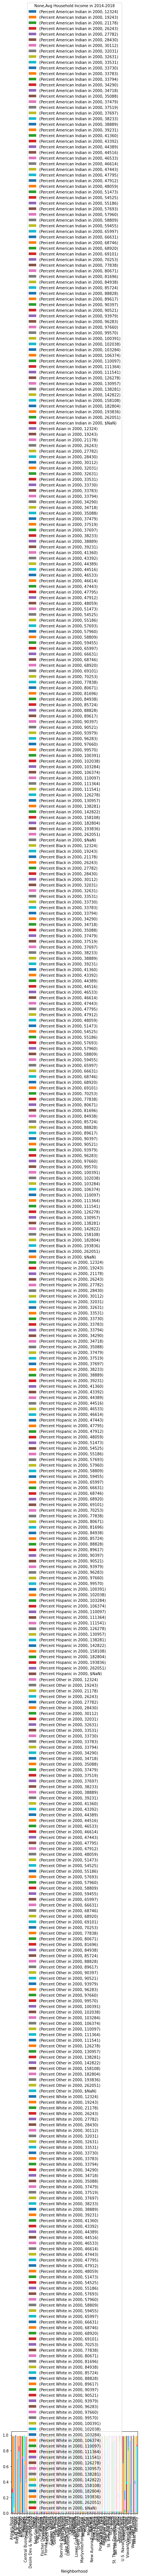

In [53]:
'''
race_income_2000 = race_income.pivot_table(
    index="Neighborhood", columns=["Percent Black in 2000", "Percent White in 2000", 
                                   "Percent Asian in 2000", "Percent American Indian in 2000", 
                                   "Percent Hispanic in 2000", "Percent Other in 2000"],
    values="Avg Household Income in 2000")

race_income_2014_2018 = race_income.pivot_table(
    index="Neighborhood", columns=["Percent Black in 2014-2018", "Percent White in 2014-2018", 
                                   "Percent Asian in 2014-2018", "Percent American Indian in 2014-2018", 
                                   "Percent Hispanic in 2013-2017", "Percent Other in 2013-2017"],
    values="Avg Household Income in 2014-2018")
'''
race_income_2000 = race_income.pivot_table(
    index="Neighborhood", columns='Avg Household Income in 2014-2018',
    values=["Percent Black in 2000", "Percent White in 2000", 
                                   "Percent Asian in 2000", "Percent American Indian in 2000", 
                                   "Percent Hispanic in 2000", "Percent Other in 2000"])
race_income_2000.plot.bar(stacked=True)

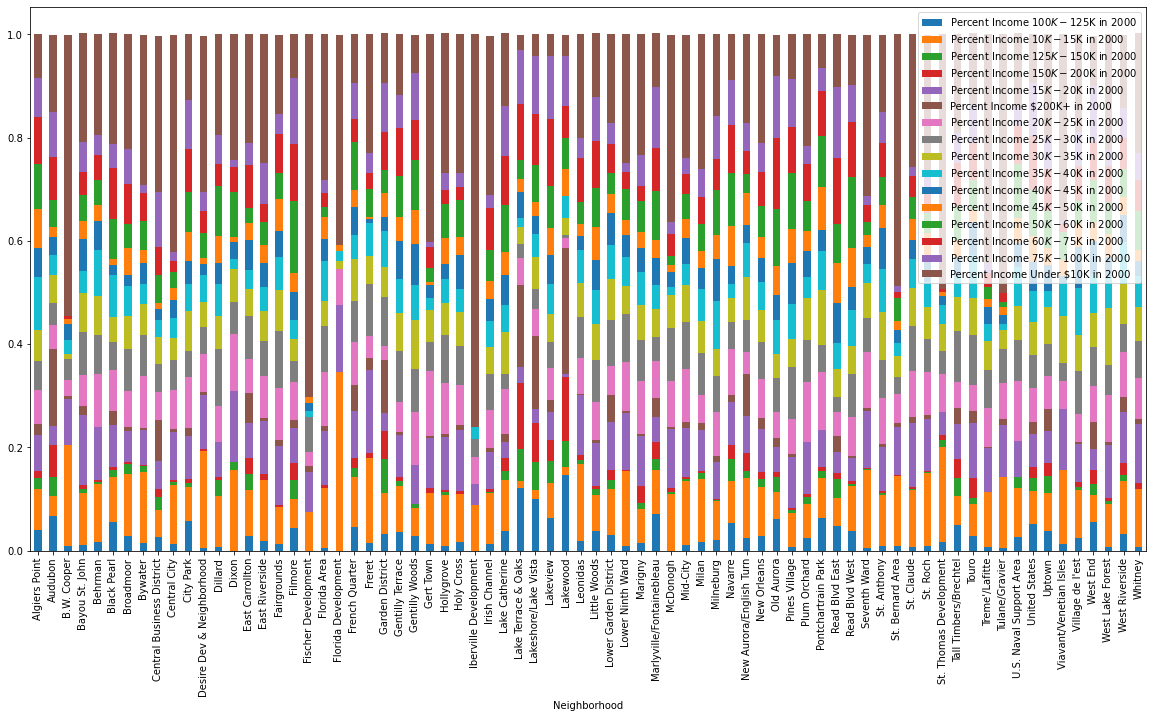

In [54]:
inc2000 = inc_dist_df.pivot_table(index='Neighborhood', values=['Percent Income Under $10K in 2000',
 'Percent Income $10K-$15K in 2000',
 'Percent Income $15K-$20K in 2000',
 'Percent Income $20K-$25K in 2000',
 'Percent Income $25K-$30K in 2000',
 'Percent Income $30K-$35K in 2000',
 'Percent Income $35K-$40K in 2000',
 'Percent Income $40K-$45K in 2000',
 'Percent Income $45K-$50K in 2000',
 'Percent Income $50K-$60K in 2000',
 'Percent Income $60K-$75K in 2000',
 'Percent Income $75K-$100K in 2000',
 'Percent Income $100K-$125K in 2000',
 'Percent Income $125K-$150K in 2000',
 'Percent Income $150K-$200K in 2000',
 'Percent Income $200K+ in 2000'], aggfunc=np.sum)
'''
lis = []
for x in inc_dist_df.columns:
    if str(x)[-4:]=='2000':
        lis.append(x)
lis
'''
fig = inc2000.plot.bar(stacked=True, figsize=(20,10))

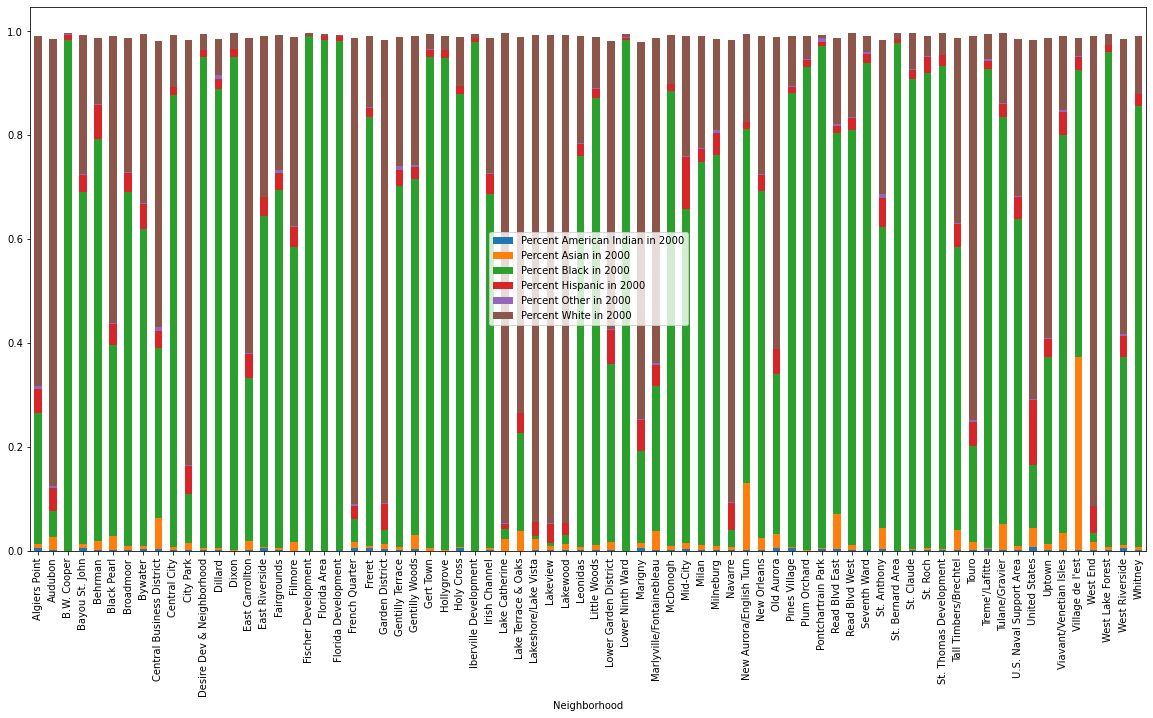

In [55]:
race_2000 = race_df.pivot_table(index='Neighborhood', values=["Percent Black in 2000", "Percent White in 2000", 
                                   "Percent Asian in 2000", "Percent American Indian in 2000", 
                                   "Percent Hispanic in 2000", "Percent Other in 2000"], aggfunc=np.sum)
race_2000.plot.bar(stacked=True, figsize=(20,10))

In [70]:
'''gapminder_years= gapminder[gapminder.year.isin(years)]
>gapminder_years.shape
(284, 6)
'''
race_df.fillna(0)
neighborhoods = ['Central City', 'Uptown', 'Mid-City', 'French Quarter', 'New Orleans']
subset = race_df[race_income.Neighborhood.isin(neighborhoods)]


race_2000 = race_df[['Neighborhood', "Percent Black in 2000", "Percent White in 2000", 
                                   "Percent Asian in 2000", "Percent American Indian in 2000", 
                                   "Percent Hispanic in 2000", "Percent Other in 2000"]]
race_2000['Year'] = "2000"


race_2014 = race_df[['Neighborhood', "Percent Black in 2014-2018", "Percent White in 2014-2018", 
                                   "Percent Asian in 2014-2018", "Percent American Indian in 2014-2018", 
                                   "Percent Hispanic in 2013-2017", "Percent Other in 2013-2017"]]
race_2014['Year'] = "2014-2018"


#race_2000.plot.bar(stacked=True, figsize=(20,10))
#race_2014.plot.bar(stacked=True, figsize=(20,10))


both = pd.concat([race_2000, race_2014])
both.fillna(0)
subset = both[race_income.Neighborhood.isin(neighborhoods)]



race_2000 = subset.pivot_table(index=['Neighborhood', 'Year'], values=["Percent Black in 2000", 
                                                                       "Percent White in 2000", 
                                   "Percent Asian in 2000", "Percent American Indian in 2000", 
                                   "Percent Hispanic in 2000", "Percent Other in 2000"])

race_2014 = subset.groupby('Year').pivot_table(index='Year', columns='Neighborhood', values=["Percent Black in 2014-2018", 
                                                                       "Percent White in 2014-2018", 
                                   "Percent Asian in 2014-2018", "Percent American Indian in 2014-2018", 
                                   "Percent Hispanic in 2013-2017", "Percent Other in 2013-2017"])

#race_2000.plot.bar(stacked=True, figsize=(20,10))
race_2014.plot.bar(figsize=(10,10))



<ipython-input-70-a843bee8ee95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_2000['Year'] = "2000"
<ipython-input-70-a843bee8ee95>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_2014['Year'] = "2014-2018"
<ipython-input-70-a843bee8ee95>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = both[race_income.Neighborhood.isin(neighborhoods)]


AttributeError: 'DataFrameGroupBy' object has no attribute 'pivot_table'

In [ ]:

subset = race_df[race_income.Neighborhood.isin(neighborhoods)]
race_2014 = subset.pivot_table(index='Neighborhood', values=["Percent Black in 2014-2018", "Percent White in 2014-2018", 
                                   "Percent Asian in 2014-2018", "Percent American Indian in 2014-2018", 
                                   "Percent Hispanic in 2013-2017", "Percent Other in 2013-2017"])
race_2014
race_2014.plot.bar(stacked=True, figsize=(20,10))